In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, UpSampling2D, Conv2D, Flatten, Input, Dense, Reshape, MaxPooling2D
from tensorflow.keras.models import Sequential, Model
import numpy as np
import matplotlib.pyplot as plt

(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32") / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32") / 255

autoencoder = Sequential() 

autoencoder.add(Conv2D(16, kernel_size=3, padding="same", input_shape=(28, 28, 1), activation="relu"))
autoencoder.add(MaxPooling2D(pool_size=2, padding="same")) 
autoencoder.add(Conv2D(8, kernel_size=3, padding="same", activation="relu"))
autoencoder.add(MaxPooling2D(pool_size=2, padding="same")) 
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding="same", activation="relu"))

autoencoder.add(Conv2D(8, kernel_size=3, padding="same", activation="relu"))
autoencoder.add(UpSampling2D()) 
autoencoder.add(Conv2D(8, kernel_size=3, padding="same", activation="relu"))
autoencoder.add(UpSampling2D()) 
autoencoder.add(Conv2D(8, kernel_size=3, activation="relu"))
autoencoder.add(UpSampling2D()) 
autoencoder.add(Conv2D(1, kernel_size=3, padding="same", activation="sigmoid"))

autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           5

In [ ]:
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

random_test = np.random.randint(X_test.shape[0], size=5)

In [2]:
ae_imgs = autoencoder.predict(X_test)

plt.figure(figsize=(7, 2))

for i, image_idx in enumerate(random_test) :

    ax = plt.subplot(2, 7, i+1)

    plt. imshow(X_test[image_idx].reshape(28, 28))
    ax.axis("off")
    ax = plt.subplot(2, 7, 7+i+1)

313/313 [==============================] - 5s 14ms/step


NameError: name 'random_test' is not defined

<Figure size 700x200 with 0 Axes>

In [ ]:
for i, image_idx in enumerate(random_test):    #랜덤하게 뽑은 이미지를 차례로 나열합니다.
   ax = plt.subplot(2, 7, i + 1) 
   plt.imshow(X_test[image_idx].reshape(28, 28))  #테스트할 이미지를 먼저 그대로 보여줍니다.
   ax.axis('off')
   ax = plt.subplot(2, 7, 7 + i +1)
   plt.imshow(ae_imgs[image_idx].reshape(28, 28))  #오토인코딩 결과를 다음열에 출력합니다.
   ax.axis('off')

Epoch 1/50
469/469 [==============================] - 52s 106ms/step - loss: 0.2133 - val_loss: 0.1425
Epoch 2/50
469/469 [==============================] - 51s 109ms/step - loss: 0.1308 - val_loss: 0.1208
Epoch 3/50
469/469 [==============================] - 50s 106ms/step - loss: 0.1172 - val_loss: 0.1122
Epoch 4/50
469/469 [==============================] - 51s 109ms/step - loss: 0.1100 - val_loss: 0.1066
Epoch 5/50
469/469 [==============================] - 50s 106ms/step - loss: 0.1056 - val_loss: 0.1028
Epoch 6/50
469/469 [==============================] - 58s 124ms/step - loss: 0.1023 - val_loss: 0.0996
Epoch 7/50
469/469 [==============================] - 62s 132ms/step - loss: 0.0996 - val_loss: 0.0972
Epoch 8/50
469/469 [==============================] - 55s 117ms/step - loss: 0.0974 - val_loss: 0.0952
Epoch 9/50
469/469 [==============================] - 54s 114ms/step - loss: 0.0957 - val_loss: 0.0941
Epoch 10/50
469/469 [==============================] - 53s 112ms/step - l

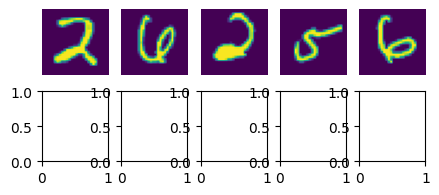

In [3]:
# 컴파일 및 학습을 하는 부분
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

# 학습된 결과를 출력하는 부분
random_test = np.random.randint(X_test.shape[0], size=5)

# 테스트할 이미지를 랜덤으로 호출
ae_imgs = autoencoder.predict(X_test)   # 앞서 만든 오토인코더 모델에 넣기


plt.figure(figsize=(7, 2))         # 출력할 이미지 크기 정하기


for i, image_idx in enumerate(random_test):
    # 랜덤으로 뽑은 이미지를 차례로 나열
    ax = plt.subplot(2, 7, i+1)
    # 테스트할 이미지를 먼저 그대로 보여줌
    plt.imshow(X_test[image_idx].reshape(28, 28))
    ax.axis('off')
    ax = plt.subplot(2, 7, 7+i+1)

--- 

In [ ]:
from ast  import literal_eval

movies['genres']= movies['genres'].apply(literal_eval)
movies['keywords']= movies['keywords'].apply(literal_eval)
movies['genres']= movies['genres'].apply(lambda x: [y['name'] for y in x])
movies['keywords']= movies['keywords'].apply(lambda x: [y['name'] for y in x])
movies[['genres','keywords']][:1]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

movies['genres_literal']= movies['genres'].apply(lambda x :(' ').join(x))
count_vect=CountVectorizer(min_df=0, ngram_range=(1,2))
genre_mat= count_vect.fit_transform(movies['genres_literal'])
print(genre_mat.shape)

from sklearn.metrics.pairwise import cosine_similarity

genre_sim =cosine_similarity(genre_mat,genre_mat)
print(genre_sim.shape)
print(genre_sim[:2])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
genre_sim = cosine_similarity(genre_mat,genre_mat)
print(genre_sim.shape)
print(genre_sim[:2]) # 영화 간 장르 유사도를 코사인 유사도로 계산
2:07
genre_sim_sorted_ind = genre_sim.argsort()[:,::-1]
print(genre_sim_sorted_ind[:1]) # 첫번째 영화와 유사도가 높은 영화 순서
2:07
# 특정 영화와 장르 유사도가 높은 영화를 반환하는 함수
def find_sim_movie(df,sorted_ind,title_name,top_n=10):
    # 인자로 입력된 movies의 DataFrame에서 'title'컬럼이 입력된 title_name 값인 DataFrame 추출
    title_movie = df[df['title']==title_name]
    # title_named를 가진 DataFrame의 index 객체를 ndarray로 반환하고
    # sorted_ind 인자로 입력된 genre_sim_sorted_ind 객체엇 유사도 순으로 top_n 개의 index 추출
    title_index = title_movie.index.values
    similar_indexes = sorted_ind[title_index,:(top_n)]
    # 추출된 top_n index들 출력, top_n index는 2차원 데이터
    # DataFrame에서 index로 사용하기 위해서 1차원 array로 변경
    print(similar_indexes)
    similar_indexes = similar_indexes.reshape(-1)
    return df.iloc[similar_indexes]

반응

댓글

2:07
similar_indexes = find_sim_movie(movies,genre_sim_sorted_ind,'The Godfather',10)
similar_indexes[['title','vote_average']]
새 항목
2:08
# 가중평점(평점&평가횟수) 반영한 영화 추천
@ 가중평점(Weighted Rating):
    (v/(v+m))*R + (m/(v+m))*C
-v : 영화별 평점을 투표한 횟수(vote_count) $ 투표횟수가 많은 영화에 가중치 부여
-m : 평점을 부여하기 위한 투표 횟수 -> 여기서는 투표수 상위 60%
-R : 개별 영화에 대한 평균 평점(vote_average)
-C : 전체 영화에 대한 평균 평점(movies['vote_average'].mean())
# C, m은 고정값
# v, R은 영화마다 변동값
2:08
# 상위 60%에 해당하는 vote_count를 최소 투표 횟수인 m으로 지정
C = movies['vote_average'].mean()
m = movies['vote_count'].quantile(0.6)
2:08
# C : 전체 영화에 대한 평균평점 = 약 6점
# m : 평점을 부여하기 위한 최소 투표 횟수 = 370회(상위 60% 기준)
print('C',round(C,3), 'm',round(m,3))
2:08
def Weighted_vote_average(record):
    v = record['vote_count']
    R = record['vote_average']
    return ((v/(v+m))*R + (m/(v+m))*C)
2:08
# 기존 데이터에 가중평점 컬럼 추가
movies['weighted_vote'] = movies.apply(Weighted_vote_average,axis=1)
2:08
# 먼저 장르 유사성 높은 영화 20개 선정 후, 가중평점순 10개 선정
def find_sim_movie_ver2(df,sorted_ind,title_name,top_n=10):
    title_movie = df[df['title'] == title_name]
    title_index = title_movie.index.values
    # top_n의 2배에 해당하는 장르 유사성이 높은 index 추출
    similar_indexes = sorted_ind[title_index,:(top_n*2)]
    similar_indexes = similar_indexes.reshape(-1)
    # 기준 영화 index는 제외
    similar_indexes = similar_indexes[similar_indexes != title_index]
    # top_n의 2배에 해당하는 후보군에서 weighted_vote 높은 순으로 top_n 만큼 추출
    return df.iloc[similar_indexes].sort_values('weighted_vote',ascending=False)[:top_n]
2:08
similar_indexes = find_sim_movie_ver2(movies,genre_sim_sorted_ind, 'The Godfather',10)
similar_indexes[['title','vote_average','weighted_vote','genres','vote_count']]
2:08
similar_movies = find_sim_movie_ver2(movies,genre_sim_sorted_ind,'Spider-Man 3', 10)
similar_movies[['title','vote_average','weighted_vote','genres','vote_count']]